# XOR Prediction Neural Network
#### A simple neural network which will learn the XOR logic gate.

I will provide you with any links necessary so that you can read about the different aspects of this NN(Neural Network).

## Neural Network Info

#### All information regarding the neural network:

- Input Layer Units = 2 
- Hidden Layer Units = 3
- Output Layer Units = 1

- No. of hidden layers = 1
- Learning Algorithm = Backpropagation



Feel free to mess around with it and try out different things.

In [175]:
import numpy as np # For matrix math
import matplotlib.pyplot as plt # For plotting

import sys # For printing

### Neural Network Implementation
Initially, I was going to approach this in an Object Oriented manner but I think that it would be much easier to read and implement, functionally. So, let's get started.

### Training Data

The XOR logic gate returns true when the number of inputs given is odd and false when they're even. Here is the simple training dataset.

In [176]:
# The training data.
X = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])

# The labels for the training data.
y = np.array([
    [1],
    [1],
    [0],
    [0]
])

In [177]:
X

array([[0, 1],
       [1, 0],
       [1, 1],
       [0, 0]])

In [178]:
y

array([[1],
       [1],
       [0],
       [0]])

### Additional Parameters
These are just additional parameters which are required by the weights for their dimensions.

In [179]:
num_i_units = 2 # Number of Input units
num_h_units = 3 # Number of Hidden units
num_o_units = 1 # Number of Output units

### Neural Network Parameters
These are the parameters required directly by the NN. Comments should describe the variables.

In [180]:
# The learning rate for Gradient Descent.
learning_rate = 0.01

# The parameter to help with overfitting.
reg_param = 0

# Maximum iterations for Gradient Descent.
max_iter = 50000

# Number of training examples
m = 4

### Weights and Biases
These are the numbers the NN needs to learn to make accurate predictions.

For the connections being made from the input layer to the hidden layer, the weights and biases are arranged in the following order: **each row contains the weights for each hidden unit**. Then, the shape of these set of weights is: *(number of hidden units X number of input units)* and the shape of the biases for this connection will be: *(number of hidden units X 1)*.

So, the overall shape of the weights and biases are:

**Weights1(Connection from input to hidden layers)**: num_h_units X num_i_units
**Biases1(Connection from input to hidden layers)**: num_h_units X 1

**Weights2(Connection from hidden to output layers)**: num_o_units X num_h_units
**Biases2(Connection from hidden to output layers)**: num_o_units X 1

### Generating the Weights

The weights here are going to be generated using a [Normal Distribution(Gaussian Distribution)](http://mathworld.wolfram.com/NormalDistribution.html). They will also be seeded so that the outcome always comes out the same.

In [181]:
np.random.seed(1)
W1 = np.random.normal(0, 1, (num_h_units, num_i_units)) # 2x2
W2 = np.random.normal(0, 1, (num_o_units, num_h_units)) # 1x2

B1 = np.random.random((num_h_units, 1)) # 2x1
B2 = np.random.random((num_o_units, 1)) # 1x1

In [182]:
W1

array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ]])

In [183]:
W2

array([[ 1.74481176, -0.7612069 ,  0.3190391 ]])

In [184]:
B1

array([[0.02738759],
       [0.67046751],
       [0.4173048 ]])

In [185]:
B2

array([[0.55868983]])

### Sigmoid Function
[This](http://mathworld.wolfram.com/SigmoidFunction.html) function maps any input to a value between 0 and 1.

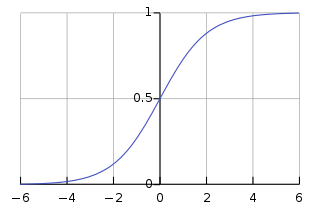

In my implementation, I have added a boolean which if set to true, will return [Sigmoid Prime(the derivative of the sigmoid function)](http://www.ai.mit.edu/courses/6.892/lecture8-html/sld015.htm) of the input value. This will be used in backpropagation later on.

In [186]:
def sigmoid(z, derv=False):
    if derv: return z * (1 - z)
    return 1 / (1 + np.exp(-z))

### Forward Propagation
[This](https://en.wikipedia.org/wiki/Feedforward_neural_network) is how predictions are made. Propagating the input through the NN to get the output.

In my implementation, the forward function only accepts a feature vector as row vector which is then converted to a column vector. Also, the predict boolean, if set to true, only returns the output. Otherwise, it returns a tuple of the outputs of all the layers.

In [187]:
def forward(x, predict=False):
    a1 = x.reshape(x.shape[0], 1) # Getting the training example as a column vector.

    z2 = W1.dot(a1) + B1 # 2x2 * 2x1 + 2x1 = 2x1
    a2 = sigmoid(z2) # 2x1

    z3 = W2.dot(a2) + B2 # 1x2 * 2x1 + 1x1 = 1x1
    a3 = sigmoid(z3)

    if predict: return a3
    return (a1, a2, a3)

### Gradients for the Weights and Biases
These variables will contain the gradients for the weights and biases which will be used by gradient descent to update the weights and biases.

Also, creating the vector which will be storing the cost values for each gradient descent iteration to help visualize the cost as the weights and biases are updated.

In [188]:
dW1 = 0 # Gradient for W1
dW2 = 0 # Gradient for W2

dB1 = 0 # Gradient for B1
dB2 = 0 # Gradient for B2

cost = np.zeros((max_iter, 1)) # Column vector to record the cost of the NN after each Gradient Descent iteration.

## Training
This is the training function which contains the meat of NN. This contains forward propagation and [Backpropagation](http://neuralnetworksanddeeplearning.com/chap2.html).

### Backpropagation
The process of propagating the error in the output layer, backwards through the NN to calculate the error in each layer. Intuition: It's like forward propagation, but backwards.

Steps(for this NN):
1. Calculate the error in the output layer(dz2).
2. Calculate the error in the weights connecting the hidden layer to the output layer using dz2 (dW2).
3. Calculate the error in the hidden layer(dz1).
4. Calculate the error in the weights connecting the input layer to the hidden layer using dz1 (dW1).
5. The errors in the biases are just the errors in the respective layers.

Afterwards, the gradients(errors) of the weights and biases are used to update the corresponding weights and biases by multiplying them with the negative of the learning rate and scaling it by divinding it by the number of training examples.

While iterating over all the training examples, the cost is also being calculated simultaneously for each example. Then, a regurlization parameter is added, although for such a small dataset, regularization is unnecessary since to perform well, the NN will have to over fit to the training data.

In [189]:
def train(_W1, _W2, _B1, _B2): # The arguments are to bypass UnboundLocalError error
    for i in range(max_iter):
        c = 0
        
        dW1 = 0
        dW2 = 0

        dB1 = 0
        dB2 = 0
        
        for j in range(m):
            sys.stdout.write("\rIteration: {} and {}".format(i + 1, j + 1))

            # Forward Prop.
            a0 = X[j].reshape(X[j].shape[0], 1) # 2x1

            z1 = _W1.dot(a0) + _B1 # 2x2 * 2x1 + 2x1 = 2x1
            a1 = sigmoid(z1) # 2x1

            z2 = _W2.dot(a1) + _B2 # 1x2 * 2x1 + 1x1 = 1x1
            a2 = sigmoid(z2) # 1x1

            # Back prop.
            dz2 = a2 - y[j] # 1x1
            dW2 += dz2 * a1.T # 1x1 .* 1x2 = 1x2

            dz1 = np.multiply((_W2.T * dz2), sigmoid(a1, derv=True)) # (2x1 * 1x1) .* 2x1 = 2x1
            dW1 += dz1.dot(a0.T) # 2x1 * 1x2 = 2x2

            dB1 += dz1 # 2x1
            dB2 += dz2 # 1x1

            c = c + (-(y[j] * np.log(a2)) - ((1 - y[j]) * np.log(1 - a2)))
            sys.stdout.flush() # Updating the text.
        
        _W1 = _W1 - learning_rate * (dW1 / m) + ( (reg_param / m) * _W1)
        _W2 = _W2 - learning_rate * (dW2 / m) + ( (reg_param / m) * _W2)

        _B1 = _B1 - learning_rate * (dB1 / m)
        _B2 = _B2 - learning_rate * (dB2 / m)
        cost[i] = (c / m) + ( 
            (reg_param / (2 * m)) * 
            (
                np.sum(np.power(_W1, 2)) + 
                np.sum(np.power(_W2, 2))
            )
        )
    return (_W1, _W2, _B1, _B2)

## Running
Now, let's try out the NN. Here, I have called the train() function. You can make any changes you like and then run all the kernels again. I have also plotted the cost function to visual how the NN performed.

The console printing might be off.

The weights and biases are then shown.

In [140]:
W1, W2, B1, B2 = train(W1, W2, B1, B2)

Iteration: 50000 and 4

In [141]:
W1

array([[ 4.74185753, -6.13103778],
       [-3.50823244, -4.63758001],
       [ 5.51520192, -3.77964294]])

In [142]:
W2

array([[ 7.5194821 , -4.41987076, -6.63780666]])

In [143]:
B1

array([[-2.32319703],
       [ 0.72576663],
       [ 1.32843545]])

In [144]:
B2

array([[3.38932348]])

### Plotting
Now, let's plot a simple plot showing the cost function with respect to the number of iterations of gradient descent.

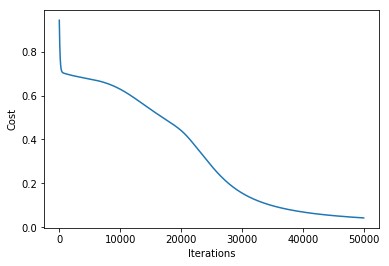

<Figure size 432x288 with 0 Axes>

In [145]:
# Assigning the axes to the different elements.
plt.plot(range(max_iter), cost)

# Labelling the x axis as the iterations axis.
plt.xlabel("Iterations")

# Labelling the y axis as the cost axis.
plt.ylabel("Cost")

# Showing the plot.
plt.show()
plt.savefig('1sr.jpg', bbox_inches='tight', pad_inches=0.0, dpi=200,)

In [150]:
forward(np.array([0, 0]),True)

array([[0.01527777]])

## Scratch implementation

Without using Numpy

In [1]:
import numpy as np # For matrix math
import matplotlib.pyplot as plt # For plotting

import sys # For printing

In [2]:
X = [[0, 1],[1, 0],[1, 1],[0, 0]]
print (X)

[[0, 1], [1, 0], [1, 1], [0, 0]]


In [3]:
y =[[1],[1],[0],[0]]

In [4]:
num_i_units = 2 # Number of Input units
num_h_units = 3 # Number of Hidden units
num_o_units = 1 # Number of Output units

In [5]:
# The learning rate for Gradient Descent.
learning_rate = 0.01

# The parameter to help with overfitting.
reg_param = 0

# Maximum iterations for Gradient Descent.
max_iter = 50000

# Number of training examples
m = 4

In [6]:
W1 = [[ 47, -61],[-35, -46],[ 55, -37]]
W2 = [ 75 , -44, -66]

B1 = [-23,7,13]
B2 = [33]

In [7]:
#Tuned parameters
# W1 = [[ 4.74185753, -6.13103778],[-3.50823244, -4.63758001],[ 5.51520192, -3.77964294]]
# W2 = [ 7.5194821 , -4.41987076, -6.63780666]

# B1 = [-2.32319703,0.72576663,1.32843545]
# B2 = [3.38932348]

In [8]:
def sigmoid(z, derv=False):
    if derv: return z * (1 - z)
    return 1 / (1 + np.exp(-z))

In [9]:
def forward(x, predict=False):
    #a1 = x.reshape(x.shape[0], 1) # Getting the training example as a column vector.
    z2=[0,0,0]
    for i in range (len(x)):
        z2[0]+=W1[0][i]*x[i]
        z2[1]+=W1[1][i]*x[i]
        z2[2]+=W1[2][i]*x[i]
    z2[0]+=B1[0]
    z2[1]+=B1[1]
    z2[2]+=B1[2]
    
    print (z2)
    
    z2[0]=z2[0]/10
    z2[1]=z2[1]/10
    z2[2]=z2[2]/10
#     z2 = W1.dot(a1) + B1 # 2x2 * 2x1 + 2x1 = 2x1
    a2 = sigmoid(np.array(z2))
    a2.tolist()
    
    a2[0]=int(a2[0]*100)
    a2[1]=int(a2[1]*100)
    a2[2]=int(a2[2]*100)
    
    print (a2)
    z3=0
    for i in range (len(a2)):
        z3+=W2[i]*a2[i]/100
    z3+=B2[0]
    print (z3)
    a3 = sigmoid(np.array(z3/10))

    if predict: return int(a3*100)
    return (a1, a2, a3)

In [14]:
forward([0,0],True)
# 00-0.0011639148470746173
# 11-0.01278397172659985
# 01-0.036059012680189254
# 10-0.32815600427794245

[-23, 7, 13]
[ 9. 66. 78.]
-40.769999999999996


1

In [13]:
import math

def sigmoid_m(x):
    return 1 / (1 + math.exp(-x))

# 

In [26]:
# sigmoid case statement verilog
for i in range (0,128):
    print ("8'sd", i,": out<= 8'sd", int(sigmoid_m(i/10)*100) ,";")

8'sd 0 : out<= 8'sd 50 ;
8'sd 1 : out<= 8'sd 52 ;
8'sd 2 : out<= 8'sd 54 ;
8'sd 3 : out<= 8'sd 57 ;
8'sd 4 : out<= 8'sd 59 ;
8'sd 5 : out<= 8'sd 62 ;
8'sd 6 : out<= 8'sd 64 ;
8'sd 7 : out<= 8'sd 66 ;
8'sd 8 : out<= 8'sd 68 ;
8'sd 9 : out<= 8'sd 71 ;
8'sd 10 : out<= 8'sd 73 ;
8'sd 11 : out<= 8'sd 75 ;
8'sd 12 : out<= 8'sd 76 ;
8'sd 13 : out<= 8'sd 78 ;
8'sd 14 : out<= 8'sd 80 ;
8'sd 15 : out<= 8'sd 81 ;
8'sd 16 : out<= 8'sd 83 ;
8'sd 17 : out<= 8'sd 84 ;
8'sd 18 : out<= 8'sd 85 ;
8'sd 19 : out<= 8'sd 86 ;
8'sd 20 : out<= 8'sd 88 ;
8'sd 21 : out<= 8'sd 89 ;
8'sd 22 : out<= 8'sd 90 ;
8'sd 23 : out<= 8'sd 90 ;
8'sd 24 : out<= 8'sd 91 ;
8'sd 25 : out<= 8'sd 92 ;
8'sd 26 : out<= 8'sd 93 ;
8'sd 27 : out<= 8'sd 93 ;
8'sd 28 : out<= 8'sd 94 ;
8'sd 29 : out<= 8'sd 94 ;
8'sd 30 : out<= 8'sd 95 ;
8'sd 31 : out<= 8'sd 95 ;
8'sd 32 : out<= 8'sd 96 ;
8'sd 33 : out<= 8'sd 96 ;
8'sd 34 : out<= 8'sd 96 ;
8'sd 35 : out<= 8'sd 97 ;
8'sd 36 : out<= 8'sd 97 ;
8'sd 37 : out<= 8'sd 97 ;
8'sd 38 : out<= 8'sd 9

In [27]:
for i in range (-127,0):
    print ("-8'sd", i*(-1),": out<= 8'sd", int(sigmoid_m(i/10)*100) ,";")

-8'sd 127 : out<= 8'sd 0 ;
-8'sd 126 : out<= 8'sd 0 ;
-8'sd 125 : out<= 8'sd 0 ;
-8'sd 124 : out<= 8'sd 0 ;
-8'sd 123 : out<= 8'sd 0 ;
-8'sd 122 : out<= 8'sd 0 ;
-8'sd 121 : out<= 8'sd 0 ;
-8'sd 120 : out<= 8'sd 0 ;
-8'sd 119 : out<= 8'sd 0 ;
-8'sd 118 : out<= 8'sd 0 ;
-8'sd 117 : out<= 8'sd 0 ;
-8'sd 116 : out<= 8'sd 0 ;
-8'sd 115 : out<= 8'sd 0 ;
-8'sd 114 : out<= 8'sd 0 ;
-8'sd 113 : out<= 8'sd 0 ;
-8'sd 112 : out<= 8'sd 0 ;
-8'sd 111 : out<= 8'sd 0 ;
-8'sd 110 : out<= 8'sd 0 ;
-8'sd 109 : out<= 8'sd 0 ;
-8'sd 108 : out<= 8'sd 0 ;
-8'sd 107 : out<= 8'sd 0 ;
-8'sd 106 : out<= 8'sd 0 ;
-8'sd 105 : out<= 8'sd 0 ;
-8'sd 104 : out<= 8'sd 0 ;
-8'sd 103 : out<= 8'sd 0 ;
-8'sd 102 : out<= 8'sd 0 ;
-8'sd 101 : out<= 8'sd 0 ;
-8'sd 100 : out<= 8'sd 0 ;
-8'sd 99 : out<= 8'sd 0 ;
-8'sd 98 : out<= 8'sd 0 ;
-8'sd 97 : out<= 8'sd 0 ;
-8'sd 96 : out<= 8'sd 0 ;
-8'sd 95 : out<= 8'sd 0 ;
-8'sd 94 : out<= 8'sd 0 ;
-8'sd 93 : out<= 8'sd 0 ;
-8'sd 92 : out<= 8'sd 0 ;
-8'sd 91 : out<= 8'sd 0 ;
-8'sd 90 :